In [1]:
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0


model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))


# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
model.fit(x_train, y_train, epochs=5)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2054 - accuracy: 0.9398
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0813 - accuracy: 0.9748
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0518 - accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0372 - accuracy: 0.9876
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0655 - accuracy: 0.9801
테스트 정확도: 0.9800999760627747


In [ ]:
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu'))
model.add(tf.keras.layers.Conv2D(64,(3,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
model.fit(x_train, y_train, epochs=5)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models



print(tf.test.gpu_device_name())
# 이미지 데이터 경로
data_dir = "./drive/MyDrive/shapes"  # 네모, 세모, 동그라미 폴더를 포함한 상위 디렉터리 경로

# 이미지 데이터를 자동으로 전처리 및 레이블링하는 ImageDataGenerator 생성
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

# 학습 데이터 생성기
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # 모델에 맞는 크기로 조절
    batch_size=32,
    class_mode='categorical',  # 다중 클래스 분류를 위해 categorical 사용
    subset='training'  # 학습 데이터로 사용
)

# 검증 데이터 생성기
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # 검증 데이터로 사용
)





# CNN 모델 생성 (간단한 예제)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # 드롭아웃 추가
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(train_generator, epochs=50, validation_data=validation_generator)


/device:GPU:0
Found 270 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/50
9/9 [==============================] - 10s 924ms/step - loss: 6.1352 - accuracy: 0.3667 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 2/50
9/9 [==============================] - 2s 168ms/step - loss: 1.7295 - accuracy: 0.3407 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 3/50
9/9 [==============================] - 2s 168ms/step - loss: 1.0905 - accuracy: 0.4333 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 4/50
9/9 [==============================] - 2s 166ms/step - loss: 1.0144 - accuracy: 0.4444 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/50
9/9 [==============================] - 2s 180ms/step - loss: 0.9229 - accuracy: 0.5630 - val_loss: 1.0955 - val_accuracy: 0.5333
Epoch 6/50
9/9 [==============================] - 2s 169ms/step - loss: 0.7493 - accuracy: 0.6481 - val_loss: 1.0693 - val_accuracy: 0.4667
Epoch 7/50
9/9 [==============================] - 2s 176ms/step 

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 데이터 로드 및 전처리
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # 정규화

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# 모델 생성
model = models.Sequential()

# Convolutional Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

# Convolutional Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

# Convolutional Block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 확인
model.summary()

# 모델 학습
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


170498071/170498071 [==============================] - 4s 0us/step
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_30 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 conv2d_60 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_31 (Ba  (None, 28, 28, 64)        256       
 tchNormalization)                                               
                                                    

In [33]:
history.history.items()

dict_items([('loss', [1.485094666481018, 1.0076913833618164, 0.8794685006141663, 0.779549241065979, 0.6927531361579895, 0.605391263961792, 0.5361900329589844, 0.4726560115814209, 0.42859020829200745, 0.38096487522125244]), ('accuracy', [0.49355998635292053, 0.6510800123214722, 0.6948000192642212, 0.730180025100708, 0.757319986820221, 0.7879400253295898, 0.8097599744796753, 0.8355000019073486, 0.849120020866394, 0.8645399808883667]), ('val_loss', [1.0408588647842407, 0.8832594752311707, 0.8453017473220825, 0.7815414667129517, 0.8075330853462219, 0.7733887434005737, 0.7939636707305908, 0.7977201342582703, 0.7810872793197632, 0.8652547001838684]), ('val_accuracy', [0.6345000267028809, 0.6875, 0.7085000276565552, 0.7315000295639038, 0.72079998254776, 0.7276999950408936, 0.7371000051498413, 0.7373999953269958, 0.7487999796867371, 0.7329000234603882])])

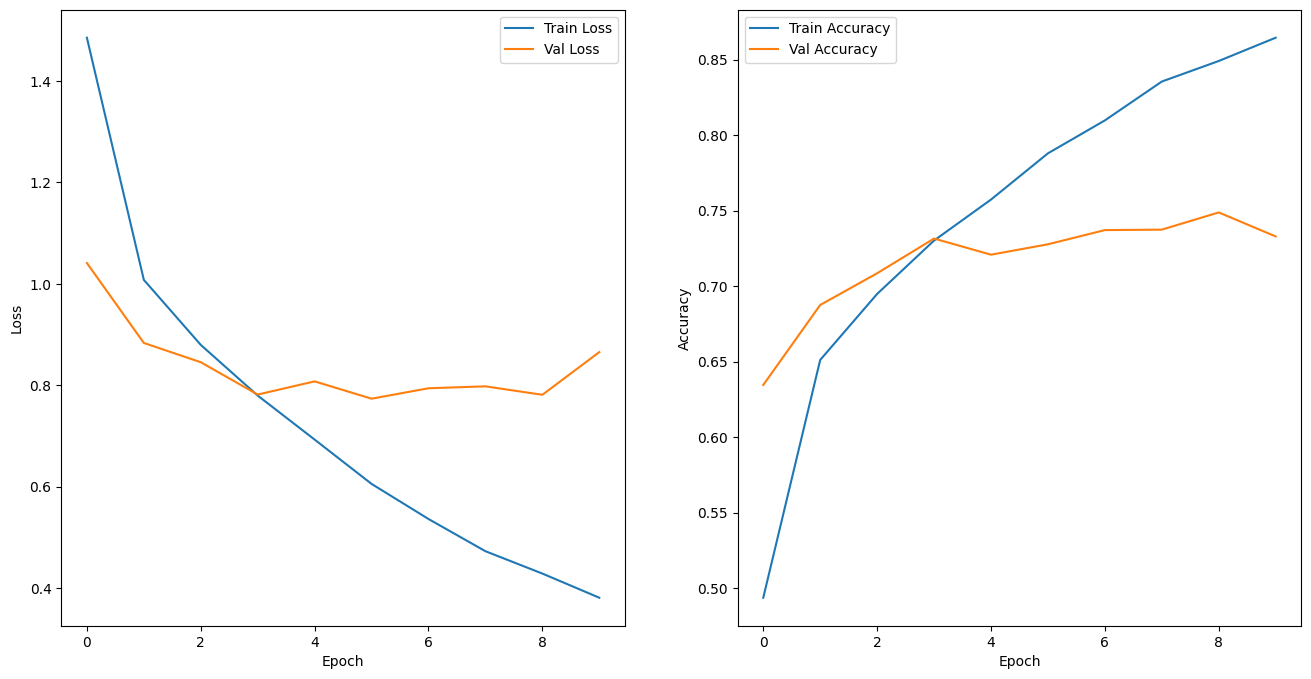

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')
  plt.legend()

  plt.show()


plot_history(history)

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 데이터 로드 및 전처리
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # 정규화

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# 모델 생성
model = models.Sequential()

# Convolutional Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

# Convolutional Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

# Convolutional Block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

# Convolutional Block 4
model.add(layers.Conv2D(2*128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 확인
model.summary()

# 모델 학습
history_100 = model.fit(train_images, train_labels, epochs=50, batch_size=32, validation_data=(test_images, test_labels))

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_39 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_21 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 conv2d_67 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_40 (Ba  (None, 28, 28, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_22 (Dropout)        (None, 28, 28, 64)      

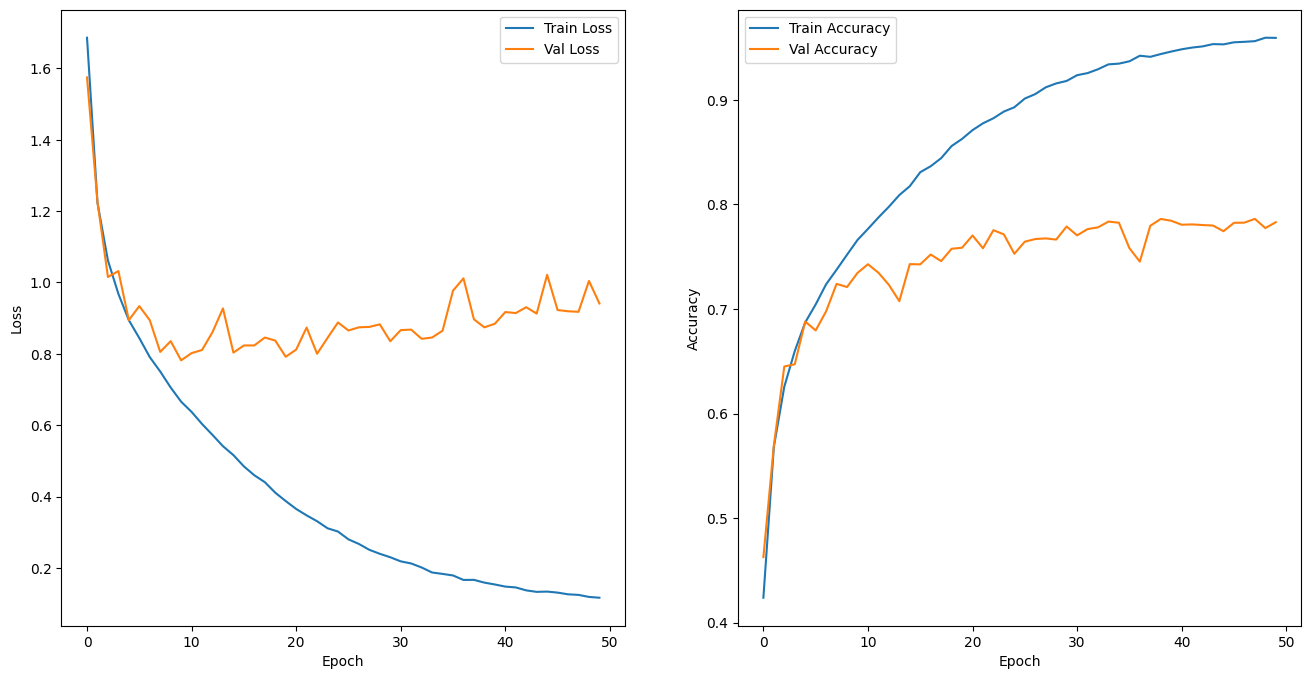

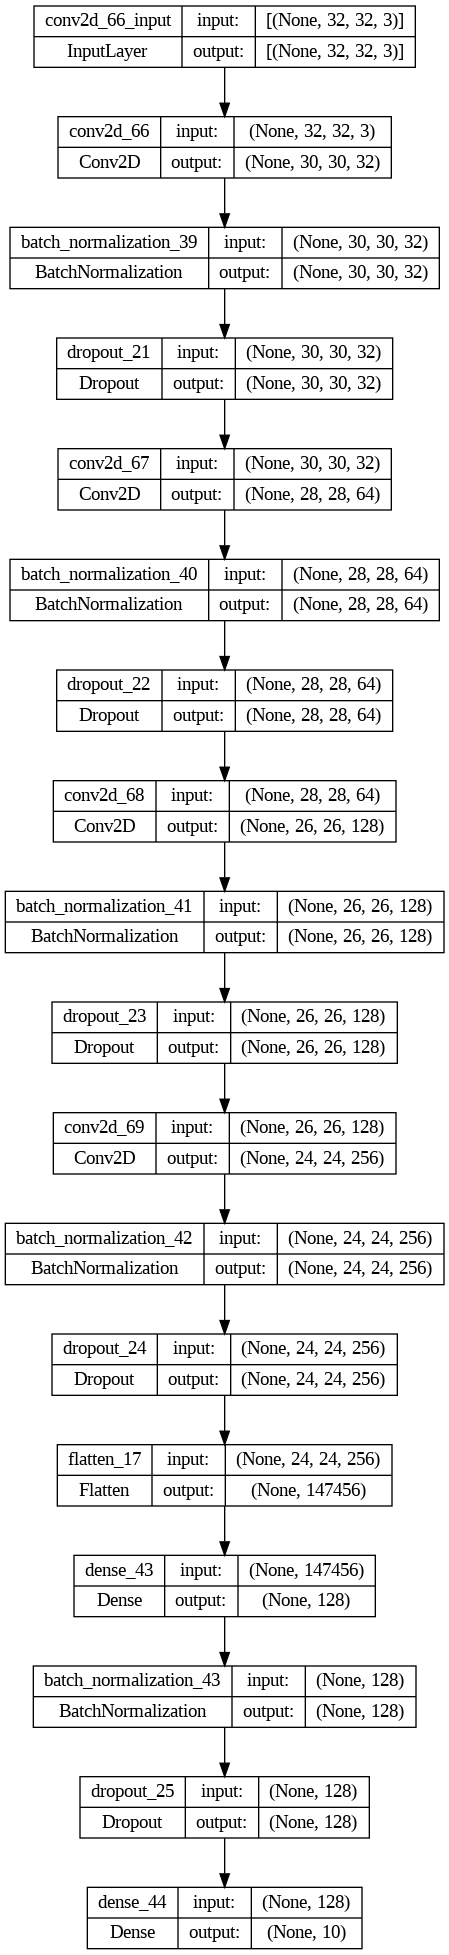

In [38]:
plot_history(history_100)
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 데이터 로드 및 전처리
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # 정규화

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# 모델 생성
model = models.Sequential()

# Convolutional Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Dropout(0.2))

# Convolutional Block 2
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

# Convolutional Block 3
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Block 4
model.add(layers.Conv2D(2*128, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))

# Convolutional Block 5
model.add(layers.Conv2D(4*128, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))
model.add(layers.MaxPooling2D((2, 2)))


# Convolutional Block 6
model.add(layers.Conv2D(8*128, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Dense(1024))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 확인
model.summary()

# 모델 학습
history = model.fit(train_images, train_labels, epochs=10, batch_size=16, validation_data=(test_images, test_labels))

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_26 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 conv2d_71 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_44 (Ba  (None, 28, 28, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_18 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 dropout_27 (Dropout)        (None, 28, 28, 64)        0         
                                                     

In [ ]:
plot_history(history_100)
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 정규화

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

model = models.Sequential()

# Convolutional Blocks
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 데이터 증강을 적용하여 모델 학습
datagen.fit(x_train)
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 72s 41ms/step - loss: 2.3030 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 2.3028 - accuracy: 0.0963 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1429/1563 [==========================>...] - ETA: 5s - loss: 2.3028 - accuracy: 0.0992

KeyboardInterrupt: ignored